# Table of Contents
 <p><div class="lev1 toc-item"><a href="#Differenciálszámítás" data-toc-modified-id="Differenciálszámítás-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Differenciálszámítás</a></div><div class="lev2 toc-item"><a href="#Határérték" data-toc-modified-id="Határérték-11"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Határérték</a></div><div class="lev2 toc-item"><a href="#Folytonosság" data-toc-modified-id="Folytonosság-12"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Folytonosság</a></div><div class="lev2 toc-item"><a href="#Deriválás" data-toc-modified-id="Deriválás-13"><span class="toc-item-num">1.3&nbsp;&nbsp;</span>Deriválás</a></div><div class="lev2 toc-item"><a href="#Parciális-deriválás" data-toc-modified-id="Parciális-deriválás-14"><span class="toc-item-num">1.4&nbsp;&nbsp;</span>Parciális deriválás</a></div><div class="lev1 toc-item"><a href="#Szélsőérték-számítás" data-toc-modified-id="Szélsőérték-számítás-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Szélsőérték számítás</a></div>

<p style="text-align: center; font-family: 'Times New Roman'; font-size:3em; font-style:bold">
Analízis 2 informatikusoknak</p><br>
<p style="text-align: center; font-family: 'Times New Roman'; font-size:1.5em; font-style:bold">(előadás)</p><br>

# Differenciálszámítás

In [1]:
from sympy import *
ip = get_ipython()
ibe = ip.configurables[-1]
ibe.figure_formats = { 'pdf', 'png'}

In [2]:
%matplotlib notebook
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d
from IPython.display import HTML,Latex, display
import requests
import numpy as np
import sympy as sp
from sympy.solvers.solveset import solveset_real
from scipy import optimize
from numpy import pi, sin, cos

In [3]:
init_printing(use_unicode=True) # nice output

In [4]:
x, y, z, alpha, beta = symbols('x y z alpha beta', real = True)

In [5]:
a, m, r, theta = symbols('a m r theta', real = True) # parameters

In [6]:
def grad(f, vars):
    return [f.diff(x_) for x_ in vars]

In [14]:
def Hessian2(f):
    return Matrix([[diff(f(x,y),x,2),diff(f(x,y),x,y)],
                  [diff(f(x,y),y,x),diff(f(x,y),y,2)]])

In [15]:
def Hessian3(f):
    return Matrix([[diff(f(x,y,z),x,2),diff(f(x,y,z),x,y),diff(f(x,y,z),x,z)],
                  [diff(f(x,y,z),y,x),diff(f(x,y,z),y,2),diff(f(x,y,z),y,z)],
                  [diff(f(x,y,z),z,x),diff(f(x,y,z),z,y),diff(f(x,y,z),z,2)]                 
                  ])

In [7]:
def surface_show(f, rectangle):
    a = rectangle[0]
    b = rectangle[1]
    c = rectangle[2]
    d = rectangle[3]
    xx = np.linspace(a, b, 100)
    yy = np.linspace(c, d, 100)
    X, Y = np.meshgrid(xx, yy)
    Z = f(X, Y)
    plt.close()
    fig = plt.figure()
    ax = plt.axes(projection="3d")
    ax.plot_surface(X, Y, Z,rstride=1, cstride=1, cmap=plt.cm.coolwarm, linewidth=0, antialiased=False)
    ax.set_xlabel('x')
    ax.set_ylabel('y')
    ax.set_zlabel('z')
    plt.show()

## Határérték

<div class="exercises">
1.) Legyen 
$$
f(x,y):=\frac{x^2 y^2}{x^2 y^2+(x-y)^2}.
$$
Ekkor
$$
\lim_{x\to 0}\left(\lim_{y\to 0} f(x,y) \right)=\lim_{y\to 0}\left(\lim_{x\to 0}f(x,y) \right)=0,
$$
mégsem létezik a határérték.
</div>

<IPython.core.display.Javascript object>


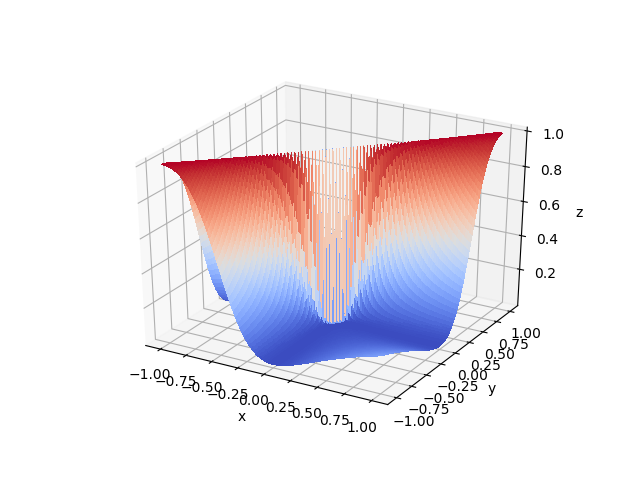

In [20]:
def f(x,y):
    return x**2*y**2/(x**2*y**2+(x-y)**2)

surface_show(f, [-1, 1, -1, 1])

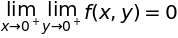

In [7]:
cc = Limit(Limit('f(x,y)',y,0), x, 0)
Eq(cc, Limit(Limit(f(x,y),y,0), x, 0).doit())

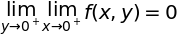

In [8]:
cc = Limit(Limit('f(x,y)',x,0), y, 0)
Eq(cc, Limit(Limit(f(x,y),x,0), y, 0).doit())

In [9]:
print("f(x,x)=", f(x,x))

f(x,x)= 1


<div class="exercises">
2.) Legyen 
$$
f(x,y):=(x+y)\sin\left(\frac{1}{x} \right)\sin\left(\frac{1}{y} \right)
$$
Ekkor a
$$
\lim_{x\to 0}\left(\lim_{y\to 0} f(x,y) \right),\quad\lim_{y\to 0}\left(\lim_{x\to 0}f(x,y) \right)
$$
kettős határértékek nem léteznek, mégis létezik a $\displaystyle{\lim_{(x,y)\to(0,0)}}f(x,y)$ határérték.
</div>

<IPython.core.display.Javascript object>


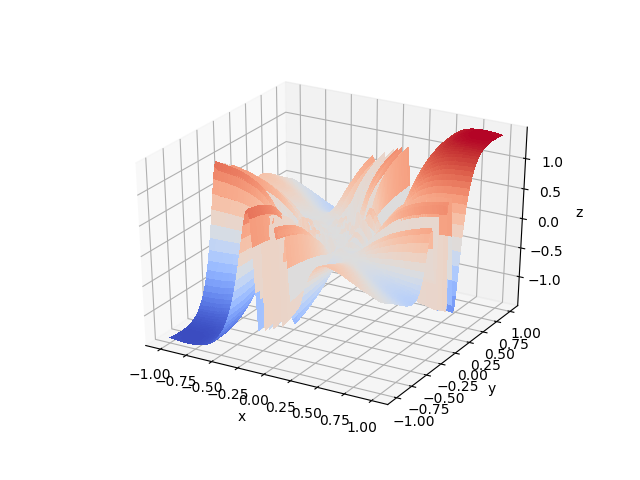

In [21]:
def f(x,y):
    return (x+y)*np.sin(1/x)*np.sin(1/y)

surface_show(f, [-1, 1, -1, 1])

<div class="solution">
$$
0\leq|f(x+y)|\leq|x+y|
$$
</div>

## Folytonosság

<div class="exercises">
1.) Legyen 
$$
f(x,y) = 
\begin{cases}
\dfrac{x^2y}{x^4+y^2},      & \text{if  } x^2+y^2\neq 0;\\
0,        & \text{if  } x^2+y^2=0.
\end{cases}
$$
Ekkor $f$ folytonos az origóban minden az origón áthaladó egyenes mentén, 
de mint kétváltozós függvény nem folytonos az origóban.
</div>

<IPython.core.display.Javascript object>


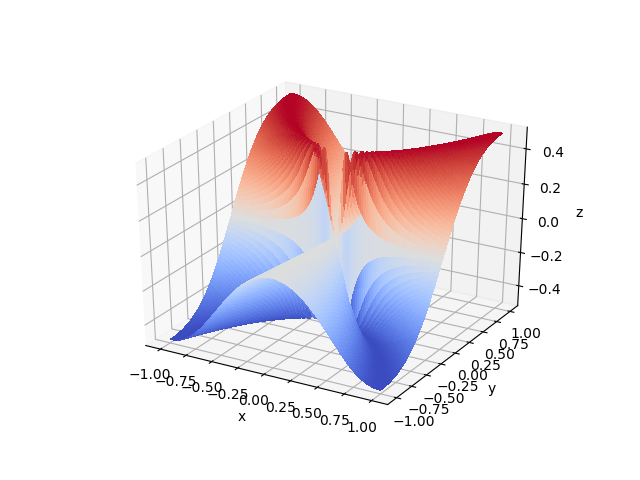

In [10]:
def f(x,y):
    return x**2*y/(x**4+y**2)

surface_show(f, [-1, 1, -1, 1])

In [12]:
display(Latex("$f(x,x^2)= %g$"%f(x, x**2)))

<IPython.core.display.Latex object>

<div class="solution">
$f(x,mx)$ értéke 
</div>

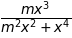

In [19]:
f(x, m*x)

<div class="solution">
Egyszerűsítés után 
</div>

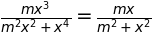

In [20]:
Eq(f(x, m*x), simplify(f(x, m*x)))

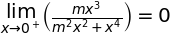

In [14]:
Eq(Limit(f(x, m*x), x, 0), limit(f(x,y), x, 0).doit())

## Deriválás

<div class="exercises">
1.) Legyen $A\in L\left(\mathbf{R}^n\right)$ adott lineáris leképezés, 
$\mathbf{x}\in\mathbf{R}^n$, és definiáljuk a következő függvényt
$$
f(\mathbf{x}):=\langle \mathbf{x}, A\mathbf{x} \rangle
$$
$f'(\mathbf{x})=$?
</div>

<div class="solution">
$$
\begin{align*}
f(\mathbf{x}+\mathbf{h})-f(\mathbf{x}) &= \langle \mathbf{x}+\mathbf{h}, A(\mathbf{x}+\mathbf{h}) \rangle
-\langle \mathbf{x}, A\mathbf{x} \rangle\\
&=\langle\mathbf{x},A\mathbf{h}\rangle +\langle \mathbf{h},A\mathbf{x}\rangle+\langle \mathbf{h},A\mathbf{h}\rangle\\
&=\langle A^T\mathbf{x},\mathbf{h}\rangle +\langle A\mathbf{x},\mathbf{h}\rangle+\langle \mathbf{h},A\mathbf{h}\rangle\\
&=\langle (A^T+A)\mathbf{x},\mathbf{h}\rangle +\langle \mathbf{h},A\mathbf{h}\rangle
\end{align*}
$$

A Cauchy-Schwarz egyenlőtlenség miatt 
$$
\left|\langle \mathbf{h},A\mathbf{h}\rangle\right|\leq\left\Vert\mathbf{h}\right\Vert
\cdot\left\Vert A\mathbf{h}\right\Vert.
$$

Ezért 
$$
\lim_{\mathbf{h}\to\mathbf{0}}\frac{\langle \mathbf{h},A\mathbf{h}\rangle}{\left\Vert\mathbf{h}\right\Vert}=0.
$$

Tehát
$$
f'(\mathbf{x})=(A+A^T)(\mathbf{x}).
$$
</div>

## Parciális deriválás

<div class="exercises">
1.) Legyen 
$$
f(x,y) = 
\begin{cases}
\dfrac{xy^3-x^3y}{x^2+y^2},      & \text{ha  } x^2+y^2\neq 0;\\
0,        & \text{ha  } x^2+y^2=0.
\end{cases}
$$
</div>

<IPython.core.display.Javascript object>


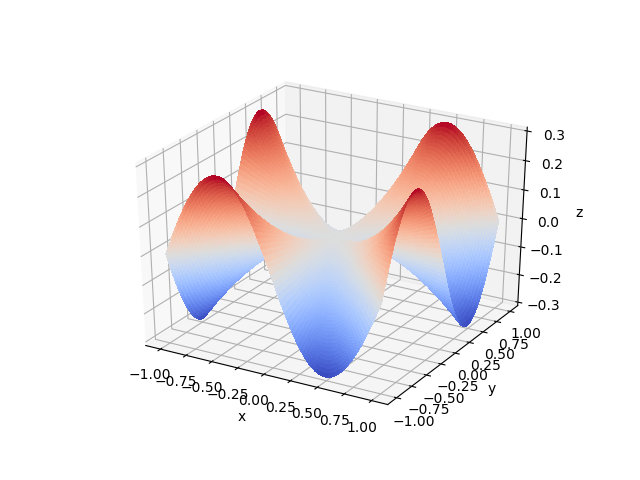

In [24]:
def f(x,y):
    return (x*y**3-x**3*y)/(x**2+y**2)

surface_show(f, [-1, 1, -1, 1])

<div class="exercises">
Ekkor $f_{xy}''(0,0)\neq f_{yx}''(0,0)$.
</div>

<div class="exercises">
$$
f_x'(x,y) = 
\begin{cases}
\dfrac{3x^2-y^3}{x^2+y^2}-\dfrac{2x(x^3y-xy^3)}{(x^2+y^2)},      & \text{ha  } x^2+y^2\neq 0;\\
0,        & \text{ha  } x^2+y^2=0.
\end{cases}
$$
Hasonlóan
$$
f_y'(x,y) = 
\begin{cases}
\dfrac{x^3-3xy^2}{x^2+y^2}-\dfrac{2y(x^3y-xy^3)}{(x^2+y^2)},      & \text{ha  } x^2+y^2\neq 0;\\
0,        & \text{ha  } x^2+y^2=0.
\end{cases}
$$
Ezekből
$$
f_{xy}''(0,0)=\lim_{h\to 0}\frac{f_x'(0,h)-f_x'(0,0)}{h}=\lim_{h\to 0}\frac{-h-0}{h}=-1,
$$
és
$$
f_{yx}''(0,0)=\lim_{h\to 0}\frac{f_y'(h,0)-f_y'(0,0)}{h}=\lim_{h\to 0}\frac{h-0}{h}=1.
$$
</div>

# Szélsőérték számítás

<div class="exercises">
Legyen $U\subset\mathbf{R}^n$ nyílt halmaz, $\mathbf{x}_0\in U$, $f:U\to\mathbf{R}$ legalább 2-szer differenciálható függvény. Ekkor
$$
f(\mathbf{x})=f(\mathbf{x}_0)+\langle f'(\mathbf{x}_0), \mathbf{x}-\mathbf{x}_0 \rangle+
\frac{1}{2}\langle \mathbf{x}-\mathbf{x}_0, f''(\mathbf{x}_0)(\mathbf{x}-\mathbf{x}_0)  \rangle +\ldots.
$$
Ha $f$-nek szélsőértéke van $\mathbf{x}_0$-ban, akkor $f'(\mathbf{x}_0)=\mathbf{0}$ és a fenti egyenlet 
így alakul
$$
f(\mathbf{x})=f(\mathbf{x}_0)+
\frac{1}{2}\langle \mathbf{x}-\mathbf{x}_0, f''(\mathbf{x}_0)(\mathbf{x}-\mathbf{x}_0)  \rangle +\ldots.
$$
Tehát $f$ szélsőértékének jellege, $(\min, \max)$, a $\langle \mathbf{x}-\mathbf{x}_0, f''(\mathbf{x}_0)(\mathbf{x}-\mathbf{x}_0)  \rangle$ kifejezés előjelén múlik. 
</div>

<div class="exercises">
1.) Legyenek $\mathbf{r}_i\in\mathbf{R}^d$, $i=1,\ldots,n$ adott pontok. Határozzuk meg az 
$$
f(\mathbf{r}):=\sum_{i=1}^n \Vert\mathbf{r}-\mathbf{r}_i  \Vert^2
$$
függvény minimumát.
</div>

<div class="solution">
$$
f'(\mathbf{r})=\sum_{i=1}^n 2(\mathbf{r}-\mathbf{r}_i).
$$
Az $f'(\mathbf{r})=\mathbf{0}$ egyenletből 
$$
\mathbf{r}=\frac{\sum_{i=1}^n \mathbf{r}_i}{n}.
$$
</div>

<div class="exercises">
2.) Legyenek $\alpha, \beta, \gamma$ egy háromszög szögei. Határozzuk meg a
$$
g(\alpha,\beta,\gamma):=\sin(\alpha)+\sin(\beta)+\sin(\gamma)
$$
függvény maximumát.
</div>

<div class="solution">
Mivel $\alpha+\beta+\gamma=\pi$ ezért 
$$
g(\alpha,\beta,\gamma)=\sin(\alpha)+\sin(\beta)+\sin(\alpha+\beta):=f(\alpha,\beta)
$$

</div>

<IPython.core.display.Javascript object>


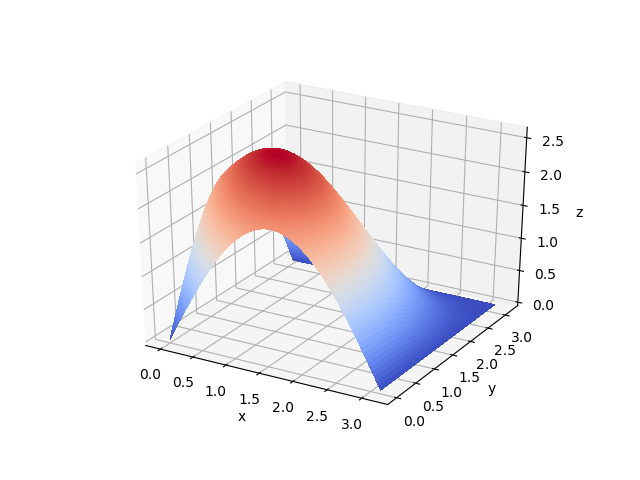

In [73]:
def f(alpha, beta):
    return np.sin(alpha)+np.sin(beta)+np.sin(alpha+beta)
surface_show(f, [0, pi, 0, pi])

In [8]:
f = sp.sin(alpha)+sp.sin(beta)+sp.sin(alpha+beta)

<div class="solution">
Az $f(\alpha,\beta)$ függvény gradiense
</div>

In [9]:
gr = grad(f,(alpha, beta))
gr

<div class="solution">
A 
$$
\begin{align*}
\cos{\left (\alpha \right )} + \cos{\left (\alpha + \beta \right )}&=0,\\
\cos{\left (\beta \right )} + \cos{\left (\alpha + \beta \right )}&=0;
\end{align*}
$$
egyenletrendszerből adódik
$$
\alpha=\beta.
$$
Visszahelyettesítve, a
$$
\cos{\left (\beta \right )} + \cos{\left (2 \beta \right )}=0
$$
egyenletet kapjuk.
</div>

In [10]:
solveset_real(gr[0].subs({alpha: beta}), beta)

<div class="solution">
Ebből következik
$$
\alpha,\beta,\gamma=\frac{\pi}{3},
$$
$$
\max g(\alpha,\beta,\gamma)=\frac{3\sqrt{3}}{2}.
$$
</div>

In [1]:
%%html
<style>
.output_subarea {
    background-color: cornsilk;
    border: 1px solid forestgreen;
    font-style:bold;
}

div.exercises {
    text-align: left; 
    font-family: 'Times New Roman'; 
    font-size:1.5em; 
    font-style:bold;
    border: 1px solid red;
    padding: 7px 3px 7px 8px;
    background-color: whitesmoke;
}

div.solution {
    font-size: 125%;
    background-color: cornsilk;
    border: 1px solid forestgreen;
    font-style:bold;
}

ol {    
    padding: 15px;
}

ol li {
    padding: 5px;
    margin-left: 25px;
}

ol ol li { 
    list-style-type: lower-alpha;
}

.myp {
    font-family: 'Times New Roman'; 
    font-size:1.4em; 
    font-style:bold;
    border: 1px solid black;
    padding: 5px 3px 5px 5px;
}
</style>

In [19]:
%%html
<script src="https://cdn.rawgit.com/parente/4c3e6936d0d7a46fd071/raw/65b816fb9bdd3c28b4ddf3af602bfd6015486383/code_toggle.js"></script>